In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Predicting the temperament of ROUSes using k-NN classification
Using other data we have in the table, we want to predict the temperament of ROUSes.

In [2]:
rouses = pd.read_csv('ROUSes.csv')
print(rouses.shape)
rouses.head()

(29, 4)


,Age,Length,Weight,Temperament
0,9.5,4.1,93.2,Sleepy
1,12.0,4.1,97.7,Moody
2,14.5,4.6,120.3,No-nonsense
3,7.0,3.3,60.4,Moody
4,10.0,3.5,75.3,No-nonsense


### Exploratory analysis
First, let's look at a scatterplot with the temperament represented as color and symbols to get a general idea of the data.

<Axes: xlabel='Age', ylabel='Length'>

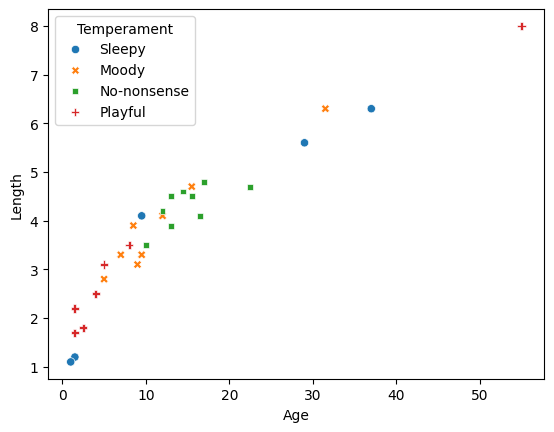

In [3]:
sns.scatterplot(data=rouses, x='Age',y='Length', hue='Temperament', style='Temperament')

As you can see, there are some clusters of the same temperament, which means the samples have the same temperament as their neighbors, so k-NN should work well for those.  But there are also definitely some samples are more "alone" so k-NN won't be as good for prediction.

In [4]:
rouses.describe()

,Age,Length,Weight
count,29.000000,29.000000,29.000000
mean,13.362069,3.841379,101.079310
std,12.042259,1.551386,79.294854
min,1.000000,1.100000,9.600000
25%,5.000000,3.100000,53.500000
50%,10.000000,3.900000,91.100000
75%,15.500000,4.600000,120.300000
max,55.000000,8.000000,378.900000


### Normalize columns
The next cell normalizes the columns so the neighbor distance calculations will be scaled equivalently.  You can try skipping this cell to see the performance without scaling.

In [5]:
# First, try skipping this cell and see results without scaling
rouses['Age'] = (rouses['Age']-rouses['Age'].min())/( rouses['Age'].max()-rouses['Age'].min()) # normalize 'Age' columns
rouses['Length'] = (rouses['Length']-rouses['Length'].min())/( rouses['Length'].max()-rouses['Length'].min()) # normalize 'Length' columns
rouses['Weight'] = (rouses['Weight']-rouses['Weight'].min())/( rouses['Weight'].max()-rouses['Weight'].min()) # normalize 'Weight' columns

rouses.head()

,Age,Length,Weight,Temperament
0,0.157407,0.434783,0.226374,Sleepy
1,0.203704,0.434783,0.238559,Moody
2,0.250000,0.507246,0.299756,No-nonsense
3,0.111111,0.318841,0.137558,Moody
4,0.166667,0.347826,0.177904,No-nonsense


Okay, as usual let's follow the train and test process:

In [6]:
train = rouses.sample(frac= 0.8, random_state=1234) # 80% rows for training
test = rouses.drop(index=train.index) # rest of rows for testing
print(train.shape, test.shape)

(23, 4) (6, 4)


In [7]:
y_train = train['Temperament']
X_train = train.drop(columns=['Temperament'])
print(X_train.shape, y_train.shape)

y_test = test['Temperament']
X_test = test.drop(columns=['Temperament']) 
print(X_test.shape, y_test.shape)

(23, 3) (23,)
(6, 3) (6,)


Notice that is a very small number of train and test samples, so our results are going to be highly dependent on how the data is split.  Let's try k-NN classification:

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Train score:',knn.score(X_train, y_train))
print('Test score:',knn.score(X_test, y_test))


Train score: 0.5652173913043478
Test score: 0.6666666666666666


In [9]:
print(X_test)
print('Prediction:',knn.predict(X_test))
print('Actual:',list(y_test))

         Age    Length    Weight
6   0.074074  0.289855  0.118874
12  0.666667  0.753623  0.621175
15  0.203704  0.449275  0.250745
19  0.157407  0.318841  0.151909
20  0.027778  0.101449  0.036285
21  0.009259  0.086957  0.015705
Prediction: ['Moody' 'Moody' 'No-nonsense' 'Moody' 'Playful' 'Playful']
Actual: ['Playful', 'Sleepy', 'No-nonsense', 'Moody', 'Playful', 'Playful']


Well, predicting 4 out of 6 isn't great, but it is actually better than expected considering the Train score.  Predicting temperament is a pretty tough challenge!  Try different values for k (`n_neighbors`) to see what changes.

# Predicting the weight of ROUSes using k-NN
Using other data we have in the table, we want to predict the weight of ROUSes.

In [10]:
rouses = pd.read_csv('ROUSes.csv')
print(rouses.shape)
rouses.head()

(29, 4)


,Age,Length,Weight,Temperament
0,9.5,4.1,93.2,Sleepy
1,12.0,4.1,97.7,Moody
2,14.5,4.6,120.3,No-nonsense
3,7.0,3.3,60.4,Moody
4,10.0,3.5,75.3,No-nonsense


<Axes: xlabel='Length', ylabel='Weight'>

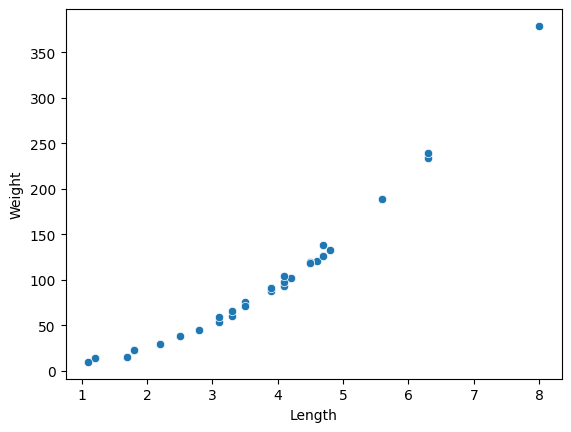

In [11]:
sns.scatterplot(data=rouses, x='Length',y='Weight')

In our previous linear regression work, we were able to use `Age` to predict `Weight` quite well because the correlation was close to linear.  Let's try using `Length` instead, and see how well we can predict despite the relationship being less linear.

In [12]:
rouses = rouses.drop(columns=['Temperament','Age']) # drop the columns 'Temperament' and 'Age'
rouses.head()

,Length,Weight
0,4.1,93.2
1,4.1,97.7
2,4.6,120.3
3,3.3,60.4
4,3.5,75.3


Train and test!

In [13]:
train = rouses.sample(frac= 0.8, random_state=4321) # 80% rows for training
test = rouses.drop(index=train.index) # rest of rows for testing
print(train.shape, test.shape)

(23, 2) (6, 2)


The next thing to do is to separate out the target data `Weight` from the predictor data (everything else; in this case just `Length` is left).

In [14]:
y_train = train['Weight']
X_train = train.drop(columns=['Weight'])
print(X_train.shape, y_train.shape)

y_test = test['Weight']
X_test = test.drop(columns=['Weight']) 
print(X_test.shape, y_test.shape)

(23, 1) (23,)
(6, 1) (6,)


Okay, let's try using weighted K-NN for regression:

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(X_train, y_train)
print('Train score:',knn.score(X_train, y_train))
print('Test score:',knn.score(X_test, y_test))


Train score: 0.9992939641734864
Test score: 0.9808235147778926


For regression a "score" (the R2 value) near 1 is what we are hoping for, and 0 is the worst result.  So our model is doing a very good job at predicting the data!

To visualize, we can plug in the test values in and have their outputs predicted:

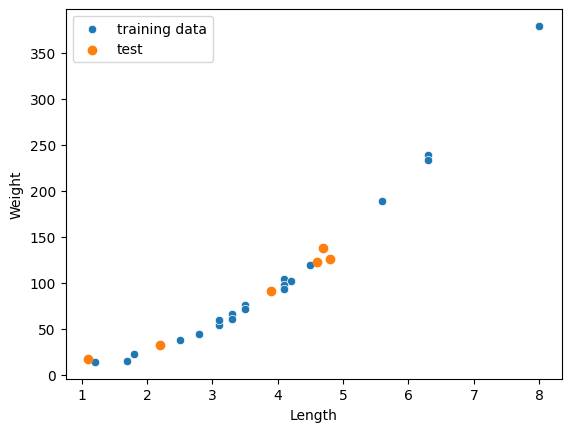

In [16]:
predictions = knn.predict(X_test)

fig, ax = plt.subplots(1)
sns.scatterplot(train,x='Length', y='Weight', label = "training data")
ax.scatter(test['Length'], predictions, label = "test")
ax.set(xlabel='Length', ylabel='Weight')
plt.legend()

Indeed, it looks like these predictions follow the trend of the data! You can try different values for k to see how the results change. 

# One-hot encoding

## Predicting the weight using length and temperament.

Let's try adding in `Temperament` along with `Length` to help predict `Weight`.  

In [17]:
rouses = pd.read_csv('ROUSes.csv')
rouses=rouses.drop(columns=['Age'])
rouses.head()

,Length,Weight,Temperament
0,4.1,93.2,Sleepy
1,4.1,97.7,Moody
2,4.6,120.3,No-nonsense
3,3.3,60.4,Moody
4,3.5,75.3,No-nonsense


Let's see how weight varies for different `Temperament`:

<Axes: xlabel='Weight', ylabel='Temperament'>

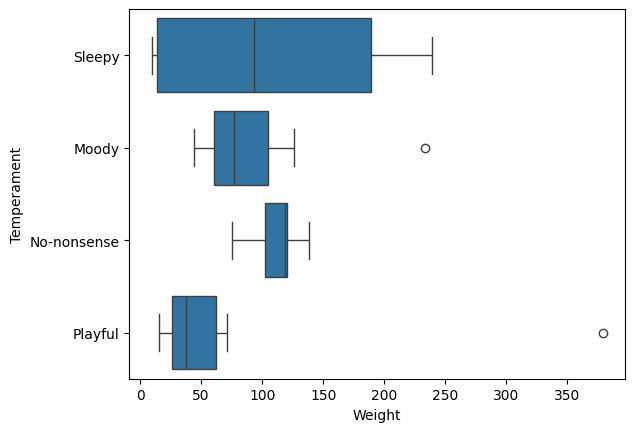

In [18]:
sns.boxplot(data=rouses, x='Weight',y='Temperament')

Uh-oh, `Temperament` might not much help to predict `Weight`!  That range of `Weight` for the `Sleepy` category means that `Temperament` won't be a very good predictor for `Weight` for ROUSes in that category, and it might actually end up hurting our predictions.  But the tighter range for `No-nonsense` is more promising.  

As we learned in lecture, to do distance calculations for a categorical feature we'll use one-hot encoding to convert `Temperament` to 4 new columns.  Also, we need to normalize the `Length` feature to make similar scales.  

In [19]:
rouses=pd.get_dummies(rouses,dtype=int)
rouses['Length']= (rouses['Length']-rouses['Length'].min())/(rouses['Length'].max()-rouses['Length'].min()) # normalize Length
rouses.head(10)

,Length,Weight,Temperament_Moody,Temperament_No-nonsense,Temperament_Playful,Temperament_Sleepy
0,0.434783,93.2,0,0,0,1
1,0.434783,97.7,1,0,0,0
2,0.507246,120.3,0,1,0,0
3,0.318841,60.4,1,0,0,0
4,0.347826,75.3,0,1,0,0
5,0.521739,138.0,0,1,0,0
6,0.289855,53.5,0,0,1,0
7,0.347826,71.5,0,0,1,0
8,0.753623,233.3,1,0,0,0
9,0.652174,189.1,0,0,0,1


So easy!  Okay, let's do the prediction for `Weight` again, now using `Length` and `Temperament` one-hot features.

In [20]:
train = rouses.sample(frac= 0.8, random_state=4321) # 80% rows for training
test = rouses.drop(index=train.index) # rest of rows for testing
print(train.shape, test.shape)

(23, 6) (6, 6)


In [21]:
y_train = train['Weight']
X_train = train.drop(columns=['Weight'])
print(X_train.shape, y_train.shape)

y_test = test['Weight']
X_test = test.drop(columns=['Weight']) 
print(X_test.shape, y_test.shape)

(23, 5) (23,)
(6, 5) (6,)


In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5,weights='distance')
knn.fit(X_train, y_train)
print('Train score:',knn.score(X_train, y_train))
print('Test score:',knn.score(X_test, y_test))


Train score: 0.9999106249457195
Test score: 0.924252276861903


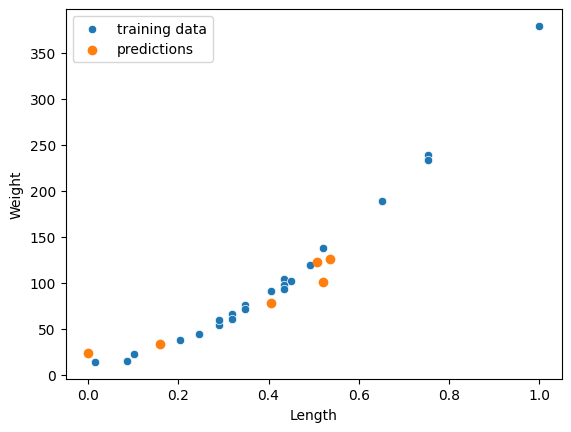

In [23]:
predictions = knn.predict(X_test)

fig, ax = plt.subplots(1)
sns.scatterplot(train,x='Length', y='Weight', label = "training data")
ax.scatter(test['Length'], predictions, label = "predictions")
ax.set(xlabel='Length', ylabel='Weight')
plt.legend()

Indeed, it looks like adding the `Temperament` feature actually hurt prediction performance.  Unlike with Linear Regression, there are no coefficients to change the importance of each feature, so it is very important to choose useful features for k-NN.